In [ ]:
import pandas as pd

In [ ]:
cities = pd.read_csv('/content/Cities-years-themes.csv')

In [ ]:
countries = pd.read_csv('/content/countries-year-themes.csv')

In [ ]:
cities

,Unnamed: 0,film_id,city,release_year,Theme,decade,theme
0,0,tt1218038,boston,2009,Politics,2000,Politics
1,1,tt1226229,new york,2010,"Family, Love",2010,Family
2,1,tt1226229,new york,2010,"Family, Love",2010,Love
3,2,tt1231290,new york,2008,"Family, Love",2000,Family
4,2,tt1231290,new york,2008,"Family, Love",2000,Love
...,...,...,...,...,...,...,...
1340,391,tt0051019,new york,1957,"Family, Love",1950,Love
1341,392,tt10172266,temple,2023,"Politics, Tourism",2020,Politics
1342,392,tt10172266,temple,2023,"Politics, Tourism",2020,Tourism
1343,393,tt1082886,new york,2008,"Family, Love",2000,Family


In [ ]:
countries

,Unnamed: 0,country,theme,year
0,0,Afghanistan,"History, Family, Nature, Sex & Nudity",2022
1,1,Algeria,Tourism,2007
2,2,Antigua and Barbuda,"Friendship, Family",2011
3,3,Aruba,"Recovery, Crime, History, Friendship, Family, ...",2021
4,4,Austria,"Friendship, Family, Science",2022
...,...,...,...,...
182,182,Turkey,History,2021
183,183,Uganda,"History, Friendship, Family, War, Nature, Poli...",2020
184,184,Ukraine,"Religious, Tourism, Crime, History, Love, Frie...",2008
185,185,Vatican City,"Tourism, Love, Family, War, Nature, Sex & Nudity",1972


## **Temporal & Geographical Changes - Visualisations for Countries**

### 1. **Temporal Distribution of Countries:**
  Create a visual that shows how the frequency of countries (or regions) changes over time.

### 2. **Theme Frequency Over Time:**
   Examine how certain themes change over time (e.g., do "History" or "Family" themes appear more frequently in certain years, like post-war depictions or more recent themes).

For the dataset you provided:

- **Data Columns:**
  - `country`: The name of the country
  - `theme`: The themes associated with the country
  - `year`: The year of the record

Let's break this into two steps and create the visuals:

1. **Distribution of Countries over Time**:
   - Plot the number of records for each year, showing which countries appear and how frequently.

2. **Themes Over Time**:
   - Count how many times each theme appears in each year to analyze how they evolve.

<ipython-input-6-f9b7c7839023>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette="viridis")


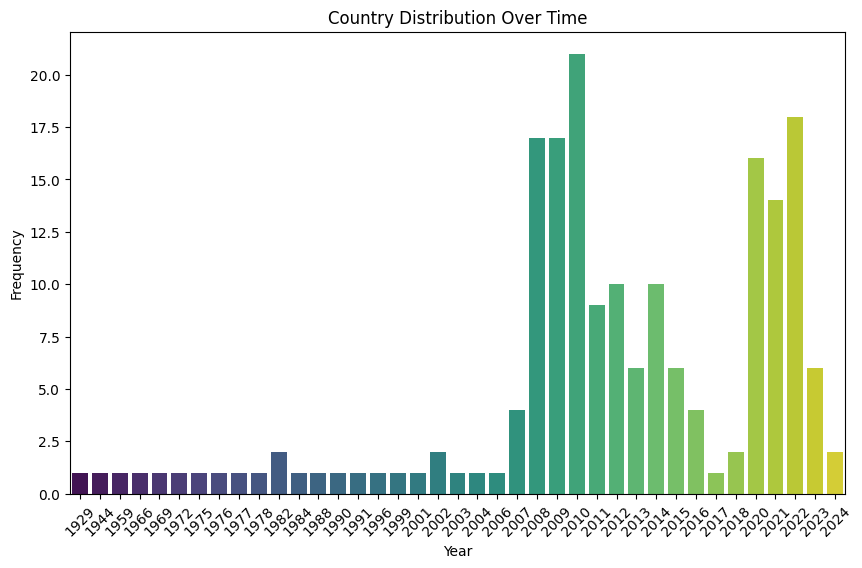

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(countries)

# 1. Temporal Distribution of Countries over Time
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette="viridis")
plt.title('Country Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-77ce379f4742>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=df, palette="viridis")


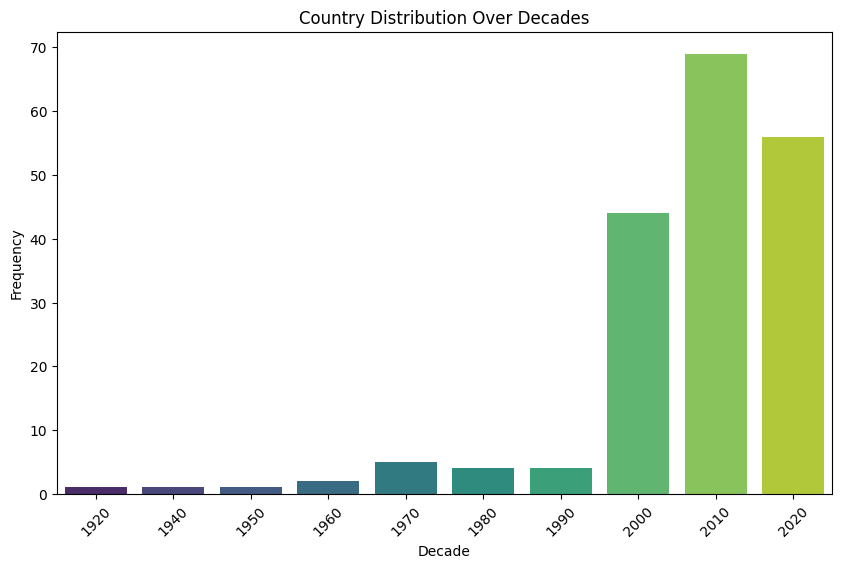

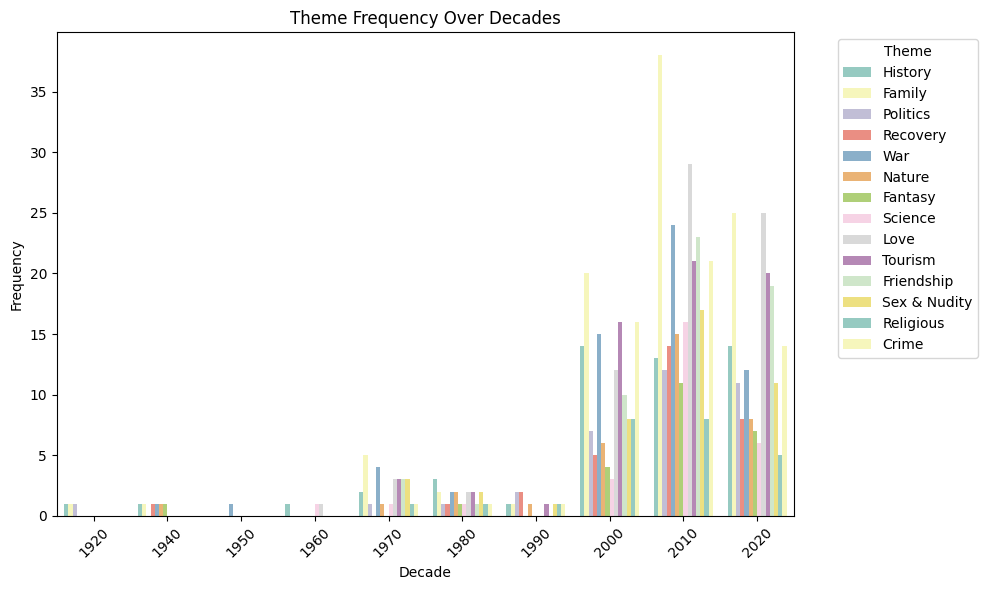

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(countries)

# 1. Add a 'decade' column to group years by decades
df['decade'] = (df['year'] // 10) * 10

# 2. Temporal Distribution of Countries over Decades
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=df, palette="viridis")
plt.title('Country Distribution Over Decades')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 3. Theme Frequency Over Decades
# Split themes into separate rows
themes_split = df['theme'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Repeat the year for each theme and create the 'decade' column for grouping
repeated_years = df['year'].repeat(df['theme'].str.split(', ').str.len()).reset_index(drop=True)
repeated_decades = df['decade'].repeat(df['theme'].str.split(', ').str.len()).reset_index(drop=True)

# Create the df_themes dataframe
df_themes = pd.DataFrame({'decade': repeated_decades, 'theme': themes_split})

# Plot the theme frequency over decades
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', hue='theme', data=df_themes, palette="Set3", dodge=True)
plt.title('Theme Frequency Over Decades')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **To define stereotypical vs nuanced themes**

### Steps:
1. Identify the Stereotypical Themes: These are themes that are often associated with simplified or stereotypical portrayals of countries. Common examples might include:
  1. Tourism (associated with a country being portrayed for its tourist attractions)
  2. War (often depicting a country as being in conflict)
  3. Crime (suggesting a country is unsafe)
  4. Nature (may suggest a focus on the natural landscape but often in a simplistic or stereotypical way)
  5. Sex & Nudity (a theme that can often be seen as a stereotype in some countries)
2. Identify the Nuanced Themes: These themes are typically more complex and show a broader range of human experience, including culture, history, and societal aspects. They might include:
  1. Family (reflecting social structures or personal connections)
  2. Friendship (depicting personal or social bonds)
  3. Science (showing technological or intellectual achievements)
  4. History (providing insight into a country's past in a rich way)
  5. Love (depicting romantic or emotional stories)
  6. Politics (showing political landscapes, conflicts, or policies)
  7. Religion (depicting spiritual beliefs or practices)
  8. Recovery (suggesting rebuilding or growth after hardship)

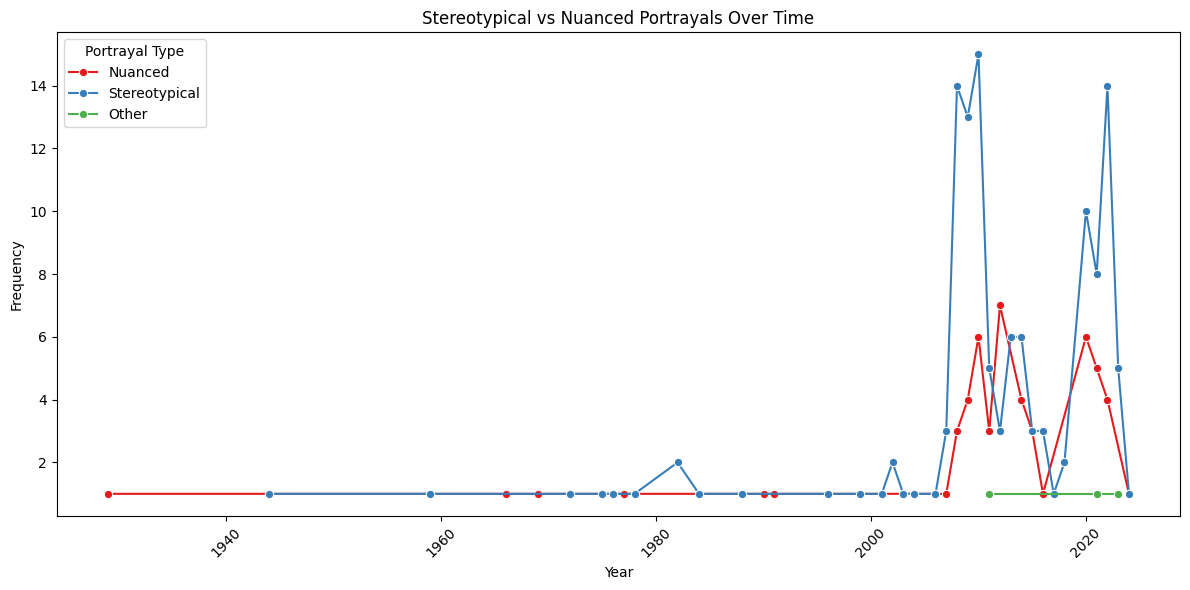

In [ ]:
stereotypical_themes = ['Tourism', 'War', 'Crime', 'Nature', 'Sex & Nudity']
nuanced_themes = ['Family', 'Friendship', 'Science', 'History', 'Love', 'Politics', 'Religion', 'Recovery']

def categorize_themes(theme_str):
    themes = theme_str.split(', ')
    if any(theme in stereotypical_themes for theme in themes):
        return 'Stereotypical'
    elif any(theme in nuanced_themes for theme in themes):
        return 'Nuanced'
    else:
        return 'Other'

df['category'] = df['theme'].apply(categorize_themes)

# 2. Count the occurrences of 'Stereotypical' and 'Nuanced' categories over time
# Create a new dataframe for counting
df_counts = df.groupby(['year', 'category']).size().reset_index(name='count')

# 3. Visualize the distribution of stereotypical vs nuanced portrayals over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_counts, x='year', y='count', hue='category', marker='o', palette='Set1')
plt.title('Stereotypical vs Nuanced Portrayals Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Portrayal Type')
plt.tight_layout()
plt.show()

### Title:
**"Top 20 Countries by Frequency of Appearance in Different Film Productions (Hollywood, Bollywood, etc.)"**

### Approach: Steps Taken to Answer the Question
To explore whether certain countries appear more frequently in specific film productions (e.g., Hollywood, Bollywood), we followed these steps:

1. **Categorize Countries by Film Industry**:
   - We created a production map to classify countries based on the film industry they are most associated with (e.g., Hollywood for the USA, Bollywood for India, Nollywood for Nigeria, etc.).

2. **Assign Production Types**:
   - Using the production map, we assigned a new column, `production_type`, to the dataframe. This column indicates which film industry each country belongs to.

3. **Count Frequency of Appearances**:
   - We grouped the data by `production_type` and `country` and counted how often each country appeared in each production type.

4. **Identify Top 20 Countries**:
   - We selected the top 20 countries with the highest frequency of appearances across all production types.

5. **Create a Pivot Table**:
   - We transformed the data into a pivot table, where rows represent countries and columns represent production types. The values in the table correspond to the frequency of appearances for each country in each production type.

6. **Visualize with a Stacked Bar Chart**:
   - A horizontal stacked bar chart was created to display the top 20 countries. Each bar represents a country, and the segments within each bar show the frequency of the country's appearance in different production types (e.g., Hollywood, Bollywood).


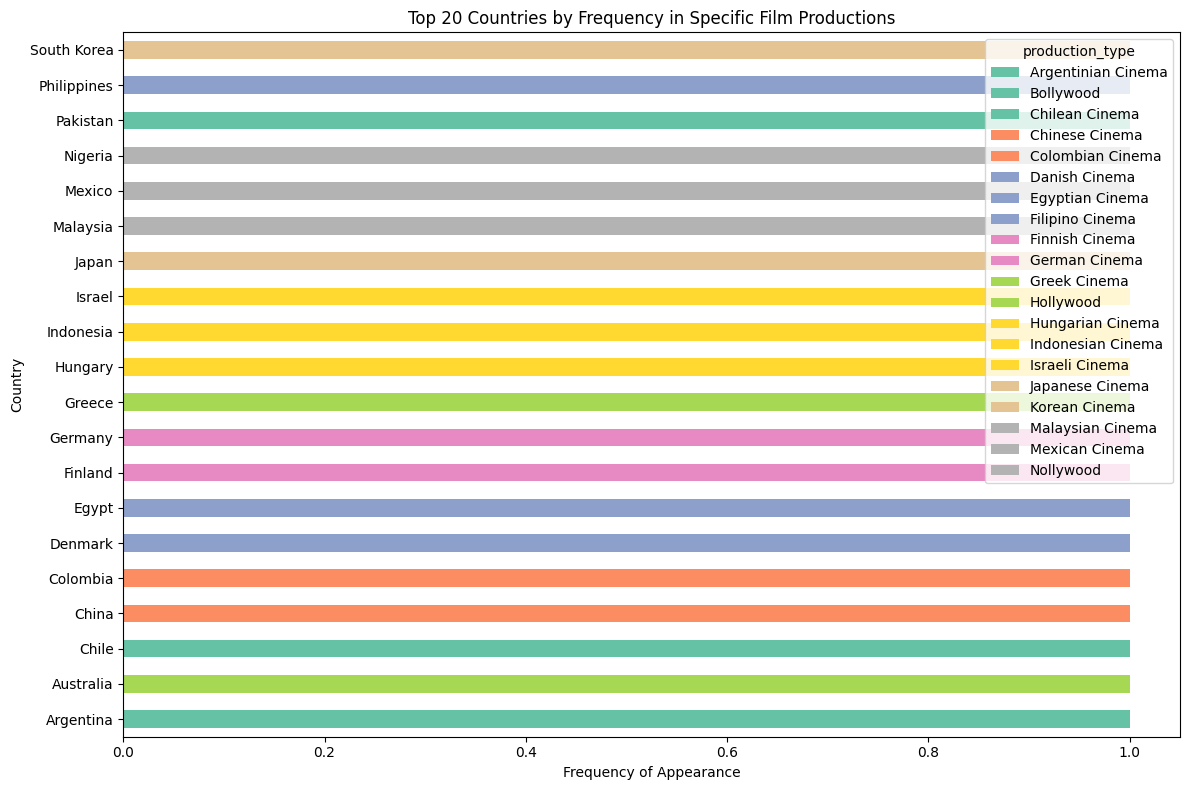

In [ ]:
production_map = {
    'USA': 'Hollywood',
    'Canada': 'Hollywood',
    'Australia': 'Hollywood',
    'India': 'Bollywood',
    'Pakistan': 'Bollywood',
    'Nigeria': 'Nollywood',
    'China': 'Chinese Cinema',
    'Hong Kong': 'Chinese Cinema',
    'UK': 'British Cinema',
    'France': 'French Cinema',
    'Italy': 'Italian Cinema',
    'Japan': 'Japanese Cinema',
    'South Korea': 'Korean Cinema',
    'Mexico': 'Mexican Cinema',
    'Spain': 'Spanish Cinema',
    'Germany': 'German Cinema',
    'Brazil': 'Brazilian Cinema',
    'Argentina': 'Argentinian Cinema',
    'Russia': 'Russian Cinema',
    'Turkey': 'Turkish Cinema',
    'Egypt': 'Egyptian Cinema',
    'Israel': 'Israeli Cinema',
    'South Africa': 'South African Cinema',
    'Iran': 'Iranian Cinema',
    'Indonesia': 'Indonesian Cinema',
    'Thailand': 'Thai Cinema',
    'Vietnam': 'Vietnamese Cinema',
    'Malaysia': 'Malaysian Cinema',
    'Philippines': 'Filipino Cinema',
    'Bangladesh': 'Bangladeshi Cinema',
    'Chile': 'Chilean Cinema',
    'Peru': 'Peruvian Cinema',
    'Colombia': 'Colombian Cinema',
    'Poland': 'Polish Cinema',
    'Finland': 'Finnish Cinema',
    'Denmark': 'Danish Cinema',
    'Norway': 'Norwegian Cinema',
    'Sweden': 'Swedish Cinema',
    'Switzerland': 'Swiss Cinema',
    'Greece': 'Greek Cinema',
    'Portugal': 'Portuguese Cinema',
    'Romania': 'Romanian Cinema',
    'Czech Republic': 'Czech Cinema',
    'Slovakia': 'Slovak Cinema',
    'Hungary': 'Hungarian Cinema',
}


# Step 1: Ensure all countries in df match those in the production_map
# Check which countries in df are not in the production_map
missing_countries = df[~df['country'].isin(production_map.keys())]['country'].unique()

# Step 2: Assign the production type based on the country mapping
df['production_type'] = df['country'].map(production_map)
# Step 3: Fill missing production types as 'Other' (if necessary)
df['production_type'] = df['production_type'].fillna('Other')

# Step 4: Count the occurrences of each country by production type
country_production_count = df.groupby(['production_type', 'country']).size().reset_index(name='count')

# Step 5: Get the top 20 countries by count
top_20_countries = country_production_count.nlargest(20, 'count')

# Step 6: Pivot the table for visualization
pivot_table = top_20_countries.pivot_table(index='country', columns='production_type', values='count', fill_value=0)

# Step 7: Plot the results
pivot_table.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set2')

plt.title('Top 20 Countries by Frequency in Specific Film Productions')
plt.xlabel('Frequency of Appearance')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### **Top 20 Countries/Production Types: Nuanced vs. Stereotypical Portrayals by Year**

#### Approach:
- Theme Classification: The data is split into stereotypical and nuanced themes based on predefined categories.
- Data Aggregation: The occurrences of these themes are counted, grouped by year and production type.
- Visualization: The top 20 countries/production types with the highest frequency of themes are visualized using a stacked bar chart, comparing nuanced vs. stereotypical portrayals over time.

<Figure size 1400x1200 with 0 Axes>

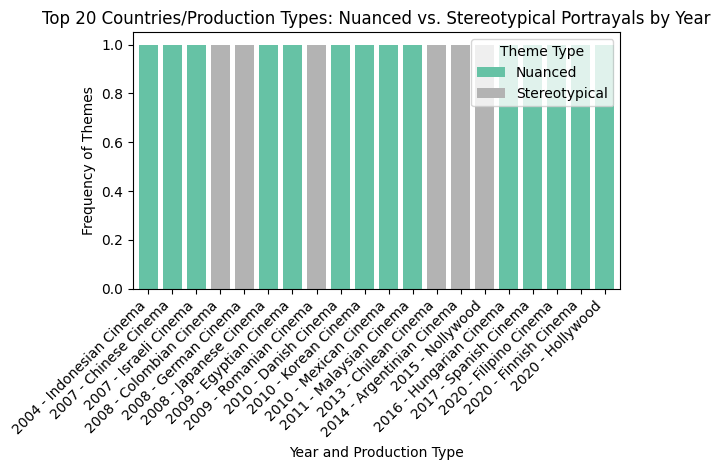

In [ ]:
# Classify each theme as stereotypical or nuanced
df['theme_type'] = df['theme'].apply(lambda x: 'Stereotypical' if x in stereotypical_themes else 'Nuanced')


# Add 'production_type' based on the country
df['production_type'] = df['country'].map(production_map).fillna('Other')

# Group by year, production type, and theme type to count occurrences
theme_counts = df.groupby(['year', 'production_type', 'theme_type']).size().reset_index(name='count')

# Filter out 'Other' production types
theme_counts = theme_counts[theme_counts['production_type'] != 'Other']

# Select the top 20 entries based on frequency of themes
top_20 = theme_counts.nlargest(20, 'count')

# Pivot the data for easier visualization
pivot_data = top_20.pivot_table(
    index=['year', 'production_type'],
    columns='theme_type',
    values='count',
    fill_value=0
)

# Create a stacked bar chart for the top 20 entries
plt.figure(figsize=(14, 12))
ax = pivot_data.plot(kind='bar', stacked=True, colormap='Set2', width=0.8)

# Customize x-axis labels to remove brackets
x_labels = ['{} - {}'.format(year, prod_type) for year, prod_type in pivot_data.index]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add titles and labels
plt.title('Top 20 Countries/Production Types: Nuanced vs. Stereotypical Portrayals by Year')
plt.xlabel('Year and Production Type')
plt.ylabel('Frequency of Themes')
plt.legend(title='Theme Type')
plt.tight_layout()
plt.show()

In [ ]:
# Define the production map
production_map = {
    'USA': 'Hollywood',
    'Canada': 'Hollywood',
    'Australia': 'Hollywood',
    'India': 'Bollywood',
    'Pakistan': 'Bollywood',
    'Nigeria': 'Nollywood',
    'China': 'Chinese Cinema',
    'Hong Kong': 'Chinese Cinema',
    'UK': 'British Cinema',
    'France': 'French Cinema',
    'Italy': 'Italian Cinema',
    'Japan': 'Japanese Cinema',
    'South Korea': 'Korean Cinema',
    'Mexico': 'Mexican Cinema',
    'Spain': 'Spanish Cinema',
    'Germany': 'German Cinema',
    'Brazil': 'Brazilian Cinema',
    'Argentina': 'Argentinian Cinema',
    'Russia': 'Russian Cinema',
    'Turkey': 'Turkish Cinema',
    'Egypt': 'Egyptian Cinema',
    'Israel': 'Israeli Cinema',
    'South Africa': 'South African Cinema',
    'Iran': 'Iranian Cinema',
    'Indonesia': 'Indonesian Cinema',
    'Thailand': 'Thai Cinema',
    'Vietnam': 'Vietnamese Cinema',
    'Malaysia': 'Malaysian Cinema',
    'Philippines': 'Filipino Cinema',
    'Bangladesh': 'Bangladeshi Cinema',
    'Chile': 'Chilean Cinema',
    'Peru': 'Peruvian Cinema',
    'Colombia': 'Colombian Cinema',
    'Poland': 'Polish Cinema',
    'Finland': 'Finnish Cinema',
    'Denmark': 'Danish Cinema',
    'Norway': 'Norwegian Cinema',
    'Sweden': 'Swedish Cinema',
    'Switzerland': 'Swiss Cinema',
    'Greece': 'Greek Cinema',
    'Portugal': 'Portuguese Cinema',
    'Romania': 'Romanian Cinema',
    'Czech Republic': 'Czech Cinema',
    'Slovakia': 'Slovak Cinema',
    'Hungary': 'Hungarian Cinema',
}

# Add a new column 'production_type' based on the country
df['production_type'] = df['country'].map(production_map)

# Handle countries not in the production_map
df['production_type'] = df['production_type'].fillna('Other')

# Confirm the column was added
print(df.head())


   Unnamed: 0               country  \
0           0           Afghanistan   
1           1               Algeria   
2           2   Antigua and Barbuda   
3           3                 Aruba   
4           4               Austria   

                                               theme  year  decade  \
0              History, Family, Nature, Sex & Nudity  2022    2020   
1                                            Tourism  2007    2000   
2                                 Friendship, Family  2011    2010   
3  Recovery, Crime, History, Friendship, Family, ...  2021    2020   
4                        Friendship, Family, Science  2022    2020   

        category production_type     theme_type  
0  Stereotypical           Other        Nuanced  
1  Stereotypical           Other  Stereotypical  
2        Nuanced           Other        Nuanced  
3  Stereotypical           Other        Nuanced  
4        Nuanced           Other        Nuanced  


Top 10 rows of theme counts:
                country  decade  \
0           Afghanistan    2020   
1               Algeria    2000   
2   Antigua and Barbuda    2010   
3                 Aruba    2020   
4               Austria    2020   
5            Azerbaijan    2010   
6               Bahamas    2020   
7            Bangladesh    2010   
8              Barbados    1970   
9               Belgium    2010   

                                               theme  count  
0              History, Family, Nature, Sex & Nudity      1  
1                                            Tourism      1  
2                                 Friendship, Family      1  
3  Recovery, Crime, History, Friendship, Family, ...      1  
4                        Friendship, Family, Science      1  
5                                               Love      1  
6                                            Tourism      1  
7                          Crime, Love, Sex & Nudity      1  
8  Tourism, History, Love, 

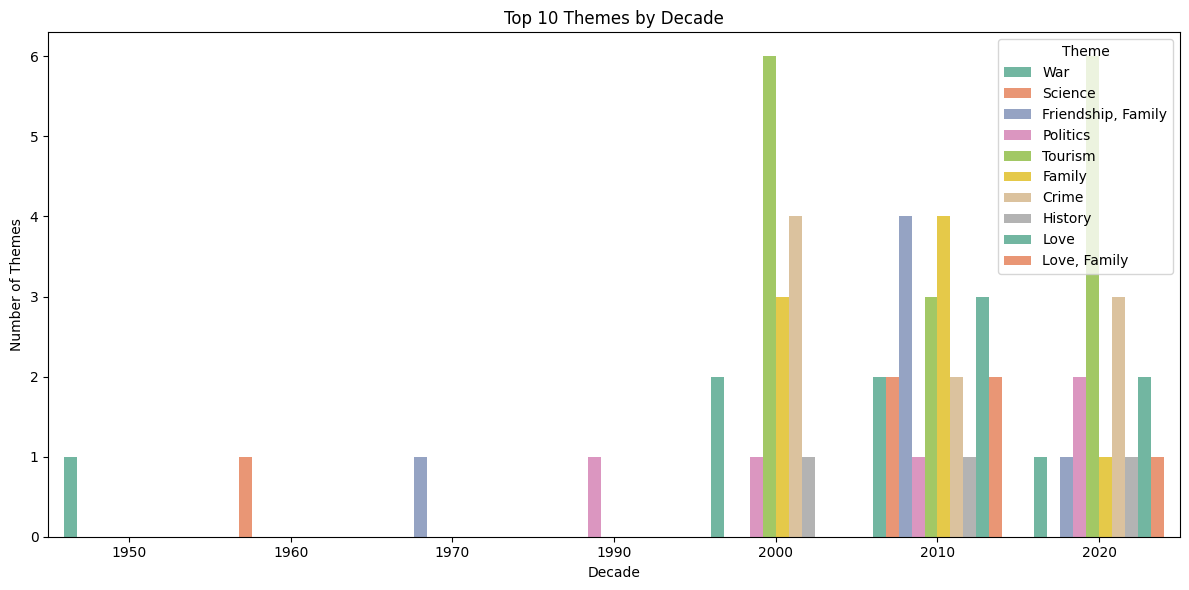

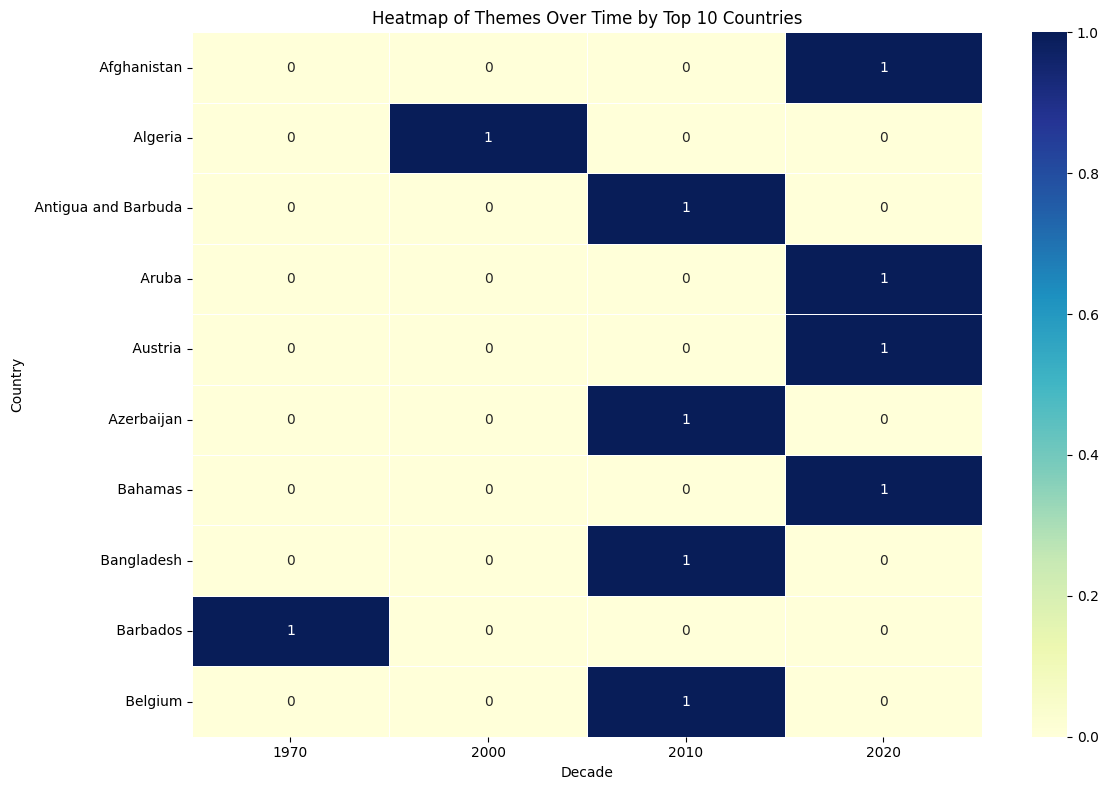

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country, decade, and theme, and get the counts
theme_counts = df.groupby(['country', 'decade', 'theme']).size().reset_index(name='count')

# Display top 10 rows
print("Top 10 rows of theme counts:")
print(theme_counts.head(10))

# Get top 10 themes by total count
top_themes = theme_counts['theme'].value_counts().nlargest(10).index
filtered_data = theme_counts[theme_counts['theme'].isin(top_themes)]

# Plot 1: Number of Themes per Decade (Overall)
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='decade', hue='theme', palette='Set2')
plt.title('Top 10 Themes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Themes')
plt.legend(title='Theme', loc='upper right')
plt.tight_layout()
plt.show()

# Get top 10 countries based on total counts
top_countries = theme_counts.groupby('country')['count'].sum().nlargest(10).index
filtered_heatmap_data = theme_counts[theme_counts['country'].isin(top_countries)]

# Pivot table for heatmap
pivot_data = filtered_heatmap_data.pivot_table(index='country', columns='decade', values='count', aggfunc='sum', fill_value=0)

# Plot 3: Heatmap of Themes Over Time for Top 10 Countries
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Themes Over Time by Top 10 Countries')
plt.xlabel('Decade')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## **Temporal & Geographical Changes - Viusalisations for Cities**

In [ ]:
cities2 = cities.copy()

## **Temporal Changes**: Do certain locations appear more frequently in specific time periods (e.g., post-war depictions of Europe)?


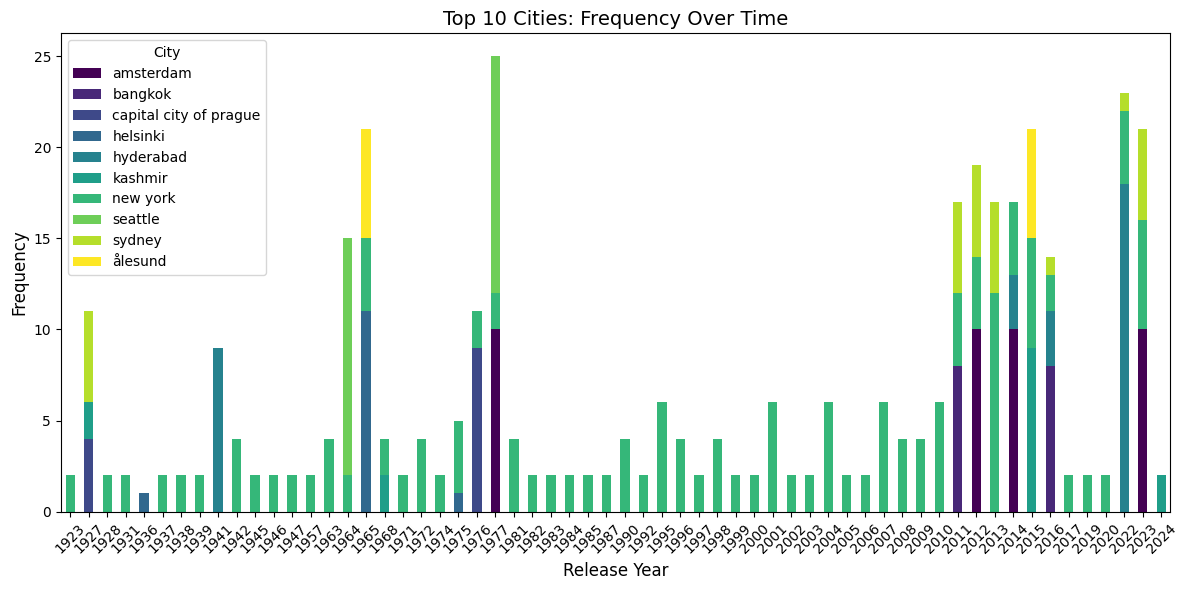

In [ ]:
top_cities = cities2['city'].value_counts().head(10).index
filtered_df = cities2[cities2['city'].isin(top_cities)]
city_year_counts = filtered_df.groupby(['release_year', 'city']).size().unstack(fill_value=0)

city_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Customizing the plot
plt.title("Top 10 Cities: Frequency Over Time", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="City", fontsize=10)
plt.tight_layout()
plt.show()

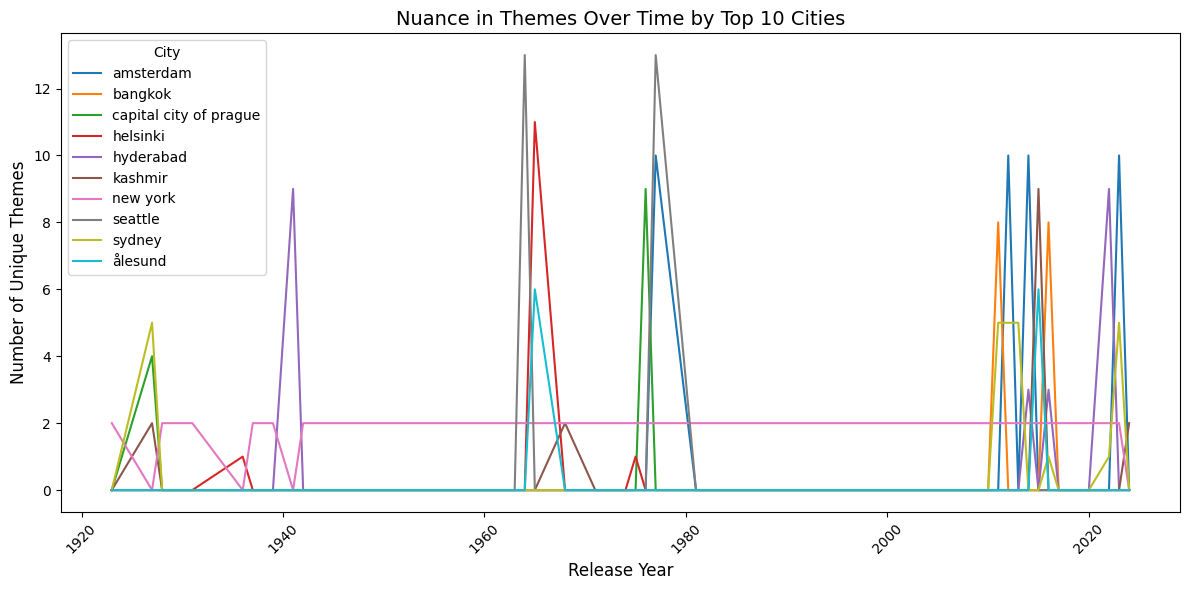

In [ ]:
# Step 1: Get the top 10 cities by overall frequency
top_cities = cities2['city'].value_counts().head(10).index

# Step 2: Filter the dataset to include only the top 10 cities
filtered_df = cities2[cities2['city'].isin(top_cities)]

# Step 3: Split themes into individual components
df_expanded = filtered_df.assign(Theme=filtered_df['Theme'].str.split(', ')).explode('Theme')

# Step 4: Group by city and release_year, count unique themes for each
nuance_trends = df_expanded.groupby(['release_year', 'city'])['Theme'].nunique().unstack(fill_value=0)

# Step 5: Plot the diversity of themes over time
nuance_trends.plot(kind='line', figsize=(12, 6), colormap='tab10')

# Customizing the plot
plt.title("Nuance in Themes Over Time by Top 10 Cities", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Unique Themes", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="City", fontsize=10, loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
city_to_production = {
    # Hollywood and other American cinema hubs
    "boston": "Hollywood",
    "new york": "Hollywood",
    "los angeles": "Hollywood",
    "san francisco": "Hollywood",
    "chicago": "Hollywood",
    "atlanta": "Hollywood",
    "miami": "Hollywood",

    # Bollywood and Indian cinema hubs
    "mumbai": "Bollywood",
    "delhi": "Bollywood",
    "kolkata": "Bollywood",
    "hyderabad": "Tollywood",  # Telugu cinema
    "chennai": "Kollywood",    # Tamil cinema
    "bangalore": "Sandalwood", # Kannada cinema

    # British Cinema
    "london": "British Cinema",
    "manchester": "British Cinema",
    "edinburgh": "British Cinema",
    "birmingham": "British Cinema",
    "cardiff": "British Cinema",

    # French Cinema
    "paris": "French Cinema",
    "lyon": "French Cinema",
    "cannes": "French Cinema",
    "marseille": "French Cinema",

    # Other European Cinema
    "rome": "Italian Cinema",
    "milan": "Italian Cinema",
    "berlin": "German Cinema",
    "munich": "German Cinema",
    "madrid": "Spanish Cinema",
    "barcelona": "Spanish Cinema",
    "amsterdam": "Dutch Cinema",
    "vienna": "Austrian Cinema",
    "warsaw": "Polish Cinema",
    "prague": "Czech Cinema",

    # Asian Cinema (outside India)
    "beijing": "Chinese Cinema",
    "shanghai": "Chinese Cinema",
    "tokyo": "Japanese Cinema",
    "kyoto": "Japanese Cinema",
    "seoul": "Korean Cinema",
    "bangkok": "Thai Cinema",
    "manila": "Philippine Cinema",
    "hong kong": "Hong Kong Cinema",

    # African Cinema
    "lagos": "Nollywood",
    "johannesburg": "South African Cinema",
    "cairo": "Egyptian Cinema",
    "nairobi": "Kenyan Cinema",

    # Latin American Cinema
    "mexico city": "Mexican Cinema",
    "buenos aires": "Argentine Cinema",
    "sao paulo": "Brazilian Cinema",
    "rio de janeiro": "Brazilian Cinema",
    "bogota": "Colombian Cinema",

    # Oceania Cinema
    "sydney": "Australian Cinema",
    "melbourne": "Australian Cinema",
    "auckland": "New Zealand Cinema",
    "wellington": "New Zealand Cinema"
}


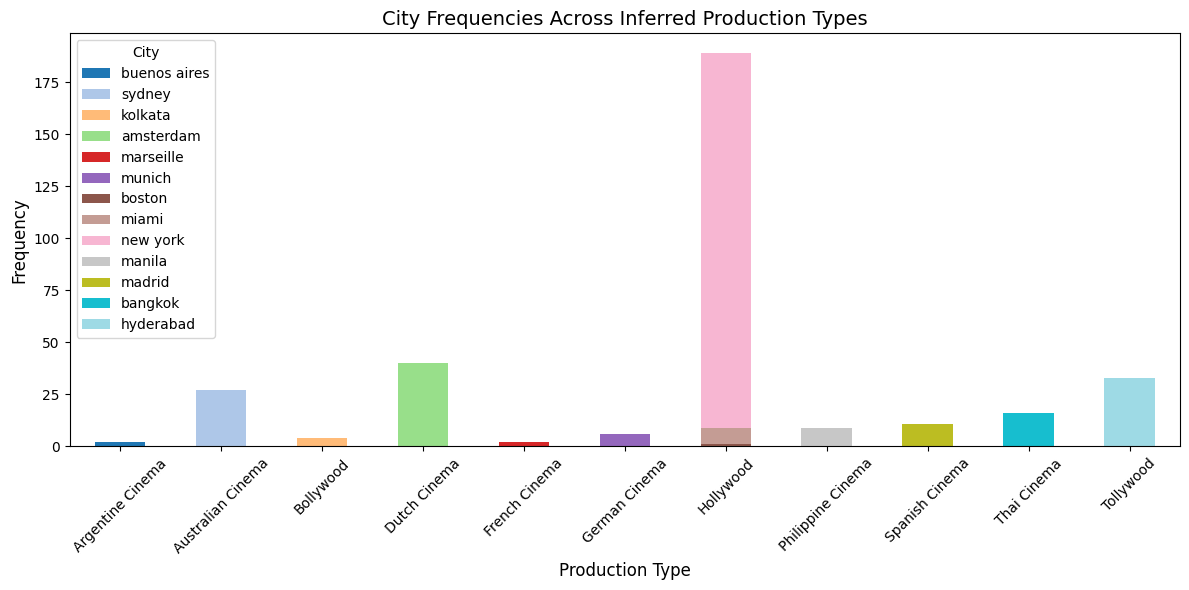

In [ ]:
# Step 2: Add a production_type column
cities2['production_type'] = cities2['city'].map(city_to_production)

# Step 3: Group by production_type and city, count occurrences
location_production_counts = cities2.groupby(['production_type', 'city']).size().unstack(fill_value=0)

# Step 4: Plot as a stacked bar chart
location_production_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title("City Frequencies Across Inferred Production Types", fontsize=14)
plt.xlabel("Production Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="City", fontsize=10, loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

## **Geographical Changes**: Have portrayals of specific locations become more nuanced in some productions over others?


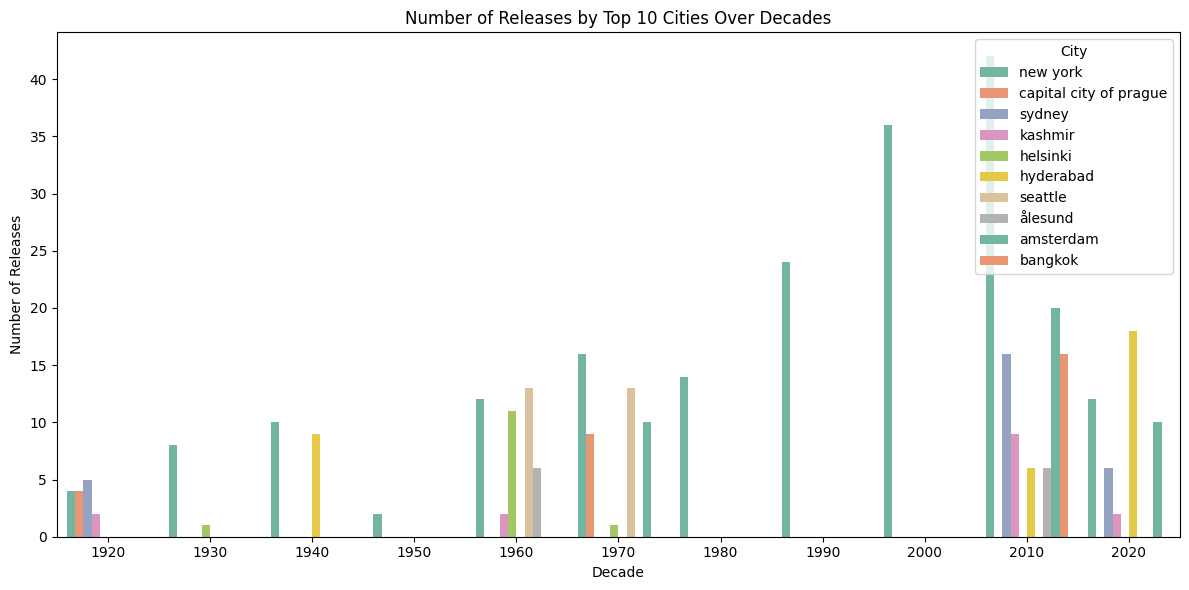

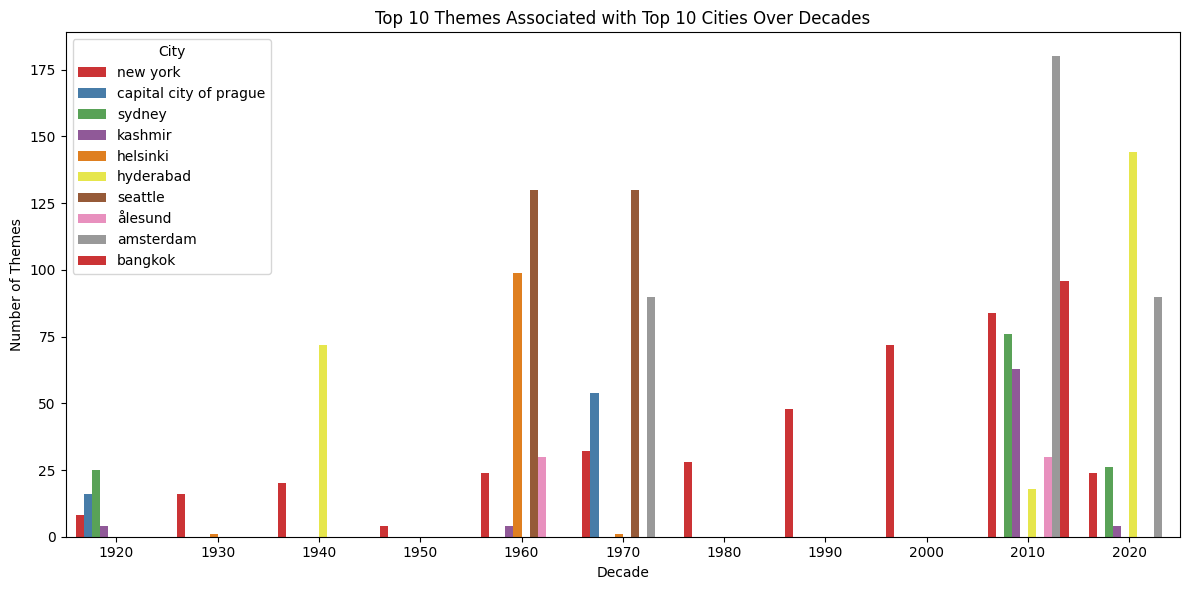

In [ ]:
# Ensure the 'Theme' column is of string type
cities2['Theme'] = cities2['Theme'].astype(str)

# Split the "Theme" column into individual themes
cities2['Theme'] = cities2['Theme'].str.split(', ')

# Normalize the data by creating a row for each theme
df_normalized = cities2.explode('Theme')

# Create a new column for the decade (grouping by decade)
cities2['decade'] = (cities2['release_year'] // 10) * 10

# Add the 'decade' column to the df_normalized DataFrame as well
df_normalized['decade'] = (df_normalized['release_year'] // 10) * 10

# Get the top 10 cities based on the number of releases
top_cities = cities2['city'].value_counts().head(10).index

# Filter the dataset to include only the top 10 cities
cities2_top10 = cities2[cities2['city'].isin(top_cities)]

# Get the top 10 themes based on their occurrence
top_themes = df_normalized['Theme'].value_counts().head(10).index

# Filter the normalized dataset to include only the top 10 themes
df_normalized_top10 = df_normalized[df_normalized['Theme'].isin(top_themes)]

# Further filter to keep only rows with the top 10 cities as well
df_normalized_top10 = df_normalized_top10[df_normalized_top10['city'].isin(top_cities)]

# Plot 1: Number of releases by top 10 cities over the decades
plt.figure(figsize=(12, 6))
sns.countplot(data=cities2_top10, x='decade', hue='city', palette='Set2')
plt.title('Number of Releases by Top 10 Cities Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Releases')
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()

# Plot 2: Top 10 themes associated with the top 10 cities over the decades
plt.figure(figsize=(12, 6))
sns.countplot(data=df_normalized_top10, x='decade', hue='city', palette='Set1')
plt.title('Top 10 Themes Associated with Top 10 Cities Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Themes')
plt.legend(title='City', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Frequency distribution of cities
city_counts = cities2['city'].value_counts()
print("City Frequency Distribution:\n", city_counts)

# Frequency distribution of themes
theme_counts = df_normalized['Theme'].value_counts()
print("Theme Frequency Distribution:\n", theme_counts)


City Frequency Distribution:
 city
new york            180
amsterdam            40
hyderabad            33
sydney               27
seattle              26
                   ... 
taiga                 1
lookout mountain      1
jodhpur               1
belfort               1
san jose              1
Name: count, Length: 246, dtype: int64
Theme Frequency Distribution:
 Theme
Family          946
Love            907
Tourism         659
War             604
Friendship      598
Sex & Nudity    577
Crime           556
Recovery        479
Nature          437
History         411
Science         357
Fantasy         326
Politics        301
Religious       257
Name: count, dtype: int64


### **City Frequency Distribution**  
- **New York (180)** dominates, likely due to its prominence in global cinema.  
- Other cities like Amsterdam (40) and Hyderabad (33) also show significant representation, reflecting their cultural or cinematic importance.  
- Cities with lower counts (e.g., Jodhpur, San Jose) are likely niche or specific settings in films.  

### **Theme Frequency Distribution**  
- **Family (946)** and **Love (907)** are the most common themes, showing their universal appeal in movies.  
- Themes like **Tourism (659)** and **War (604)** reflect diverse storytelling.  
- Lower counts (e.g., **Religious (257)** and **Politics (301)**) indicate less frequent but focused exploration of these themes.


The statistical result indicates a **significant relationship** between themes and cities. Here's a quick breakdown:  

- **Statistic (1192.51)**: Measures how much the observed data deviates from what would be expected if themes were distributed randomly across cities.  
- **P-value (3.97e-197)**: A tiny value confirms this result is highly significant, meaning the observed pattern is very unlikely due to chance.  
- **Degrees of Freedom (81)**: Reflects the complexity of the test, considering the number of cities and themes.

### **Conclusion**  
Themes are **not distributed randomly** across cities. Certain cities tend to be associated with specific themes, which aligns with cultural, historical, or cinematic trends.  

In [ ]:
import numpy as np

def compute_entropy(series):
    probabilities = series.value_counts(normalize=True)
    return -np.sum(probabilities * np.log(probabilities))

# Calculate entropy for each city
city_entropy = df_normalized.groupby('city')['Theme'].apply(compute_entropy)
print("Shannon Entropy (Diversity of Themes) per City:\n", city_entropy)




Shannon Entropy (Diversity of Themes) per City:
 city
aalst                   1.945910
abersychan              1.609438
ad dis ash sharqiyah    1.386294
adur                    1.098612
al qurayyat            -0.000000
                          ...   
yale                    1.098612
yangon                  2.079442
ålesund                 2.253858
κρηνίδες                1.945910
دهستان نازلوچای         1.386294
Name: Theme, Length: 246, dtype: float64


- **High Entropy (e.g., Ålesund):** Cities with diverse movie themes. These locations are versatile and appear in films across many genres.  
- **Low Entropy (e.g., Al Qurayyat):** Cities focused on specific or niche themes, likely due to unique cultural or historical significance.  


# Significance analysis:  Perform some statistical analysis to demonstrate whether the above results are statistically significant.


## Theme Frequency Over Decades


In [ ]:
contingency_table = pd.crosstab(df_normalized_top10['decade'], df_normalized_top10['theme'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The theme frequency across decades is statistically significant.")
else:
    print("The theme frequency across decades is not statistically significant.")


Chi-Square Statistic: 570.1312520078213
P-value: 2.0916404493096278e-56
The theme frequency across decades is statistically significant.


## Cities and Themes Analysis - A. Frequency Over Time for Top 10 Cities

In [ ]:
# Create a contingency table for cities and years
contingency_table = pd.crosstab(filtered_df['release_year'], filtered_df['city'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The frequency of releases over time for top cities is statistically significant.")
else:
    print("The frequency of releases over time for top cities is not statistically significant.")


Chi-Square Statistic: 1693.021651836196
P-value: 2.6004211428981494e-121
The frequency of releases over time for top cities is statistically significant.


## Cities and Themes Analysis - B. Nuance in Themes Over Time by Top 10 Cities



In [ ]:
# Group data by city
anova_data = [nuance_trends[city].dropna() for city in nuance_trends.columns]

# Perform ANOVA
f_stat, p_value = f_oneway(*anova_data)

print("F-Statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The nuance in themes over time for top cities is statistically significant.")
else:
    print("The nuance in themes over time for top cities is not statistically significant.")


F-Statistic: 5.989555812825916
P-value: 4.747977810389898e-08
The nuance in themes over time for top cities is statistically significant.


## Top 10 Themes by Decade and Cities


In [ ]:
# Create a contingency table for cities, decades, and themes
contingency_table = pd.crosstab(df_normalized_top10['decade'], df_normalized_top10['city'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("The distribution of top 10 themes across cities and decades is statistically significant.")
else:
    print("The distribution of top 10 themes across cities and decades is not statistically significant.")


Chi-Square Statistic: 3374.87523368394
P-value: 0.0
The distribution of top 10 themes across cities and decades is statistically significant.
